In [1]:
from empiricaldist import Pmf

In [7]:
import numpy as np
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [2]:
coin = Pmf()
coin["heads"] = 1/2
coin["tails"] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [3]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [4]:
letters = Pmf.from_seq(list("Mississippi"))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [11]:
letters('s')

np.float64(0.36363636363636365)

In [10]:
letters('t')

0

In [9]:
die([1, 4, 7])

array([0.16666667, 0.16666667, 0.        ])

In [12]:
prior = Pmf.from_seq(["Bowl 1", "Bowl 2"])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [13]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [14]:
posterior.normalize()
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [15]:
posterior["Bowl 1"]

np.float64(0.6)

In [16]:
# Second Bayesian update, drawing a second vanilla cookie

posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [17]:
# Suppose we draw a third cookie that's chocolate

likelihood_chocolate = [0.25, 0.5]

posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


In [18]:
hypos = np.arange(101)

In [19]:
prior = Pmf(1, hypos)
prior.normalize()

np.int64(101)

In [20]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [21]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [22]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


In [24]:
%matplotlib inline

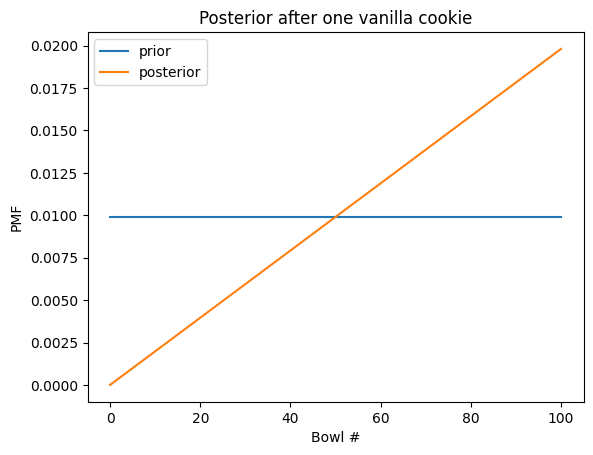

In [26]:
plt.plot(hypos, prior, label="prior")
plt.plot(hypos, posterior1, label="posterior")

plt.xlabel("Bowl #")
plt.ylabel("PMF")
plt.title("Posterior after one vanilla cookie")

plt.legend()
plt.show()

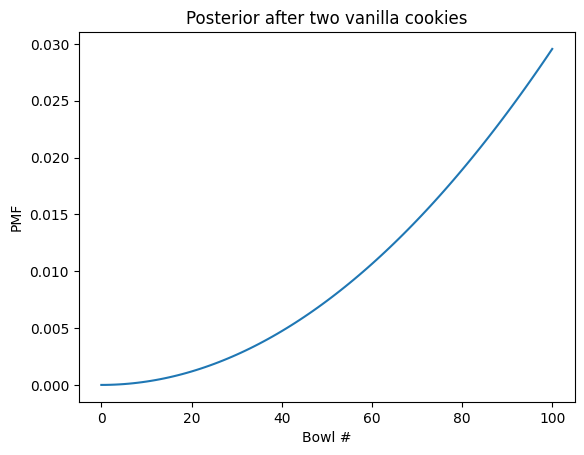

In [29]:
# Drawing another vanilla cookie from the same bowl

posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

plt.plot(hypos, posterior2, label="posterior")

plt.xlabel("Bowl #")
plt.ylabel("PMF")
plt.title("Posterior after two vanilla cookies")

plt.show()

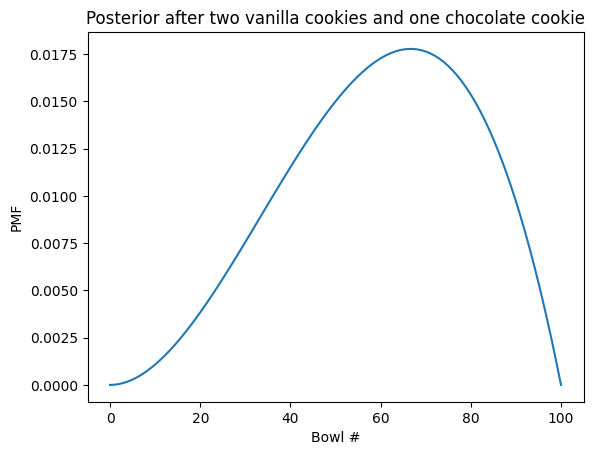

In [30]:
# Drawing a third cookie which is chocolate

likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

plt.plot(hypos, posterior3, label="posterior")

plt.xlabel("Bowl #")
plt.ylabel("PMF")
plt.title("Posterior after two vanilla cookies and one chocolate cookie")

plt.show()

In [31]:
# Compute the Maximum a Posteori Probability (MAP)

posterior3.idxmax()

np.int64(67)

In [32]:
posterior3.max_prob()

np.int64(67)

In [33]:
# DICE PROBLEM

hypos = [6, 8, 12]

prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [34]:
prior.qs

array([ 6,  8, 12])

In [35]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

In [36]:
# 1st roll of dice yields a 1

likelihood1 = 1/6, 1/8, 1/12

posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [37]:
# 2nd roll of dice yields a 7

likelihood2 = 0, 1/8, 1/12

posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [38]:
# Functional way of updating dice problem

def update_dice(pmf, data):
    """Update PMF based on new data"""
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [39]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [40]:
update_dice(pmf, 1)

In [41]:
update_dice(pmf, 7)

In [42]:
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


In [43]:
# Exercise 3-1

pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [44]:
update_dice(pmf, 1)
update_dice(pmf, 3)
update_dice(pmf, 5)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


In [46]:
# Exercise 3-2

hypos = [4, 6, 8, 12, 20]
dice_prob = [1/15, 2/15, 3/15, 4/15, 5/15]

prior = Pmf(dice_prob, hypos)
likelihood = [0, 0, 1/8, 1/12, 1/20]

posterior = prior * likelihood
posterior.normalize()
posterior

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


In [57]:
# Exercise 3-3

hypos = ["Black", "White", "Red", "Green", "Blue"]

sock_prob = [1/4, 1/4, 1/6, 1/6, 1/6]

prior = Pmf(sock_prob, hypos)

likelihood_white1 = [1/2, 1/2, 0, 0, 0]

posterior = prior * likelihood_white
posterior.normalize()

likelihood_white2 = [1/2, 1/2, 0, 0, 0]
posterior *= likelihood_white2
posterior.normalize()
posterior

,probs
Black,0.5
White,0.5
Red,0.0
Green,0.0
Blue,0.0


In [58]:
# Exercise 3-4

hypos = ["Fraternal Brother", "Fraternal Sister", "Identical"]

# prob(fraternal) = 2/3, prob(identical) = 1/3, but we know Elvis had a brother, so we can disregard half the
# fraternal twins

probs = 1/3, 1/3, 1/3

prior = Pmf(probs, hypos)

likelihood = [1/2, , 1/2]

posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Fraternal,0.666667
Identical,0.333333
